In [102]:
from utilities import *
import numpy as np
# from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

In [103]:
X_train, y_train, X_test, y_test = load_data()

In [104]:
# Training dataset
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print(np.unique(y_train, return_counts=True))

# Test dataset
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

print(np.unique(y_test, return_counts=True))


X_train shape:  (1000, 64, 64)
y_train shape:  (1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))
X_test shape:  (200, 64, 64)
y_test shape:  (200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


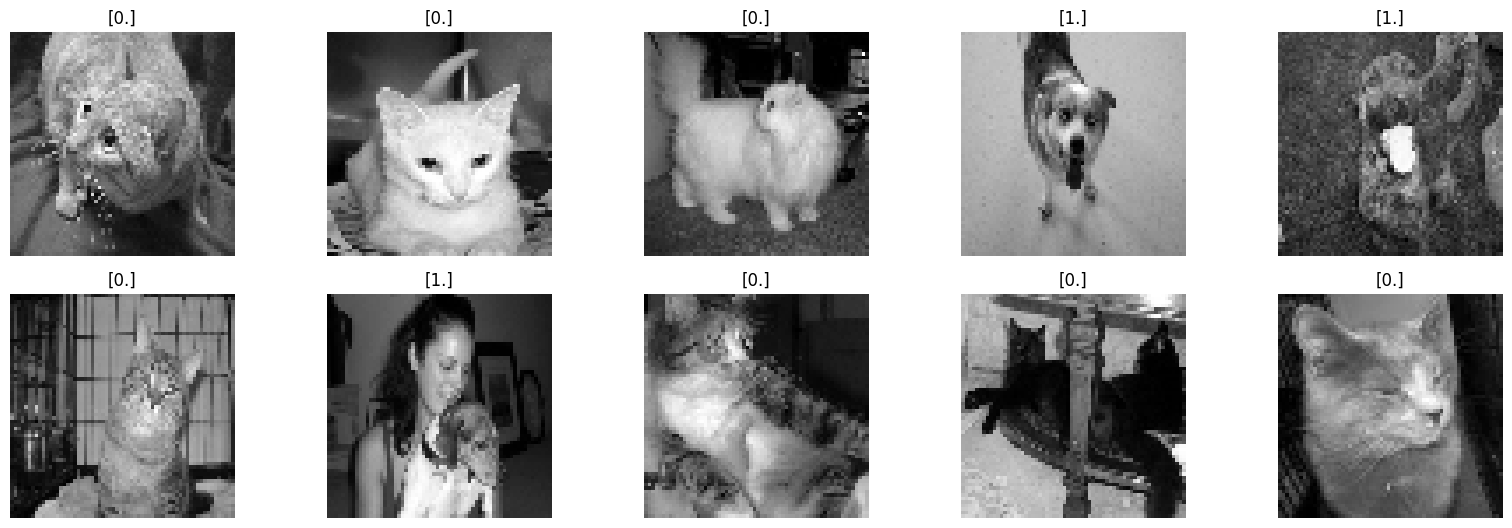

In [105]:
plt.figure(figsize=(16, 8))

for i in range(1, 11):
    plt.subplot(3, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
    plt.tight_layout()

plt.show()


In [106]:
# TODO
# 1. Normaliser le train_set et le test_set (0-255 -> 0-1)
# 2. flatten() les variables du train_set et du test_set (64*64 -> 4096)
# 3. Entrainer modele (reprendre first neuron)
# 4. Evaluer modele sur le test_set

1. Normalize

In [107]:
X_train = X_train / 255

X_test = X_test / 255

2. Flatten

In [108]:
print(X_train.shape)
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train = X_train.reshape(X_train.shape[0], -1)
print(X_train.shape)

X_test = X_test.reshape(X_test.shape[0], -1)

(1000, 64, 64)
(1000, 4096)


3. Model

In [109]:
X, y = X_train, y_train
y = y.reshape(y.shape[0], 1)

print('Dimensions de X', X.shape)
print('Dimensions de y', y.shape)


# Définit les premiers paramètres W et le biais b aléatoirement 
def initialisation(X):
    m, n = X.shape
    # w = np.zeros((n, 1))
    # b = 0
    W = np.random.randn(n, 1)
    b = np.random.randn(1)
    return W, b

W, b = initialisation(X)
print('Dimensions de W', W.shape)


def model(X, W, b):
    Z = X.dot(W) + b
    # print(np.exp(Z.max()))
    A = 1 / (1 + np.exp(-Z))
    return A

A = model(X, W, b)
print('Dimensions de A', A.shape)


def log_loss(A, y):
    epsilon = 1e-15
    return -1 / len(y) * np.sum(y * np.log(A + epsilon) + (1 - y) * np.log(1 - A + epsilon))

# print('Log loss', log_loss(A, y))


def gradients(A, X, y):
    dW = 1 / len(y) * X.T.dot(A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

dW, db = gradients(A, X, y)
print('Dimensions de dW', dW.shape)
print('Dimensions de db', db.shape)


def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)


def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

Dimensions de X (1000, 4096)
Dimensions de y (1000, 1)
Dimensions de W (4096, 1)
Dimensions de A (1000, 1)
Dimensions de dW (4096, 1)
Dimensions de db ()


In [127]:
from tqdm import tqdm

In [133]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    
    W, b = initialisation(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        
        # activations
        A = model(X_train, W, b)
        
        if i % 10 == 0:
            # Train
            train_loss.append(log_loss(A, y_train))
            train_acc.append(accuracy_score(y_train, predict(X_train, W, b)))
            # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            test_acc.append(accuracy_score(y_test, predict(X_test, W, b)))

        # mise à jour des paramètres
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train loss')
    plt.plot(test_loss, label='Test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train acc')
    plt.plot(test_acc, label='Test acc')
    plt.legend()
    plt.show()

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    return (W, b)

100%|██████████| 10000/10000 [01:30<00:00, 110.42it/s]


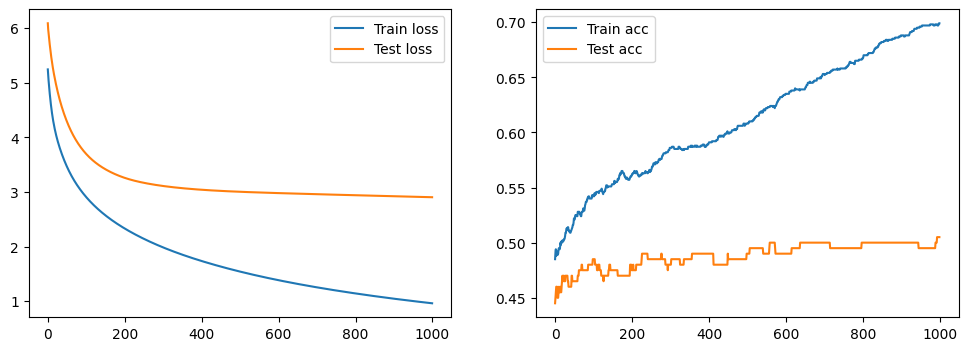

0.699


In [135]:
# X, y = X_train, y_train
# print(X)
# y = y.reshape(y.shape[0], 1)

# print('Dimensions de X', X.shape)
# print('Dimensions de y', y.shape)

W, b = artificial_neuron(X_train, y_train, X_test, y_test, learning_rate=0.01, n_iter=10000)

In [114]:
predictions = predict(X_test, W, b)

# print(predictions)

print(accuracy_score(y_test, predictions))

0.465
